In [1]:
%matplotlib inline

In [36]:
#Imports necessarios
import collections
import itertools
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt

from pandas import concat
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#Load dos dados
originalData = pds.read_csv('medical.csv')
print(originalData.shape)
originalData.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
def format_data_readable(df):
    """
    Formata os dados para uma versão mais human readable
    
    Parameters:
    -----------
    df: `pandas.DataFrame`. Contains appointment data.
    
    Returns:
    --------
    formated_df: `pandas.DataFrame`. Contains appointment data in a more readable way.
    """
    
    #Verifica se o objeto passado é um pandas.DatafRame
    assert isinstance(df, pds.DataFrame), "Expected df to be a pandas DataFrame object. Got {}.".format(type(df))
    
    #Formatacao de dataset para gráficos
    formated_df = df.copy()
    formated_df.SMS_received = formated_df.SMS_received.map({0: 'No SMS', 1: 'Sms Received'})
    formated_df['No-show'] = formated_df['No-show'].map({'Yes': 'No Show', 'No': 'Show Up'})
    
    return formated_df

In [7]:
#Formatacao de dataset para gráficos
analysisData = format_data_readable(originalData)
analysisData.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No SMS,Show Up
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No SMS,Show Up
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No SMS,Show Up
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No SMS,Show Up
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No SMS,Show Up


In [10]:
def categorical_to_numerical(df):
    """
    Transforma features categóricas em numéricas
    
    Parameters:
    -----------
    df: `pandas.DataFrame`. Contains appointment data.
    
    Returns:
    --------
    formated_df: `pandas.DataFrame`. Contains appointment data with transformed categorical features.
    """
    
    #Verifica se o objeto passado é um pandas.DatafRame
    assert isinstance(df, pds.DataFrame), "Expected df to be a pandas DataFrame object. Got {}.".format(type(df))
    
    #Mapeia features categóricas para valores numéricos
    formated_df = df.copy()
    formated_df['No-show'] = formated_df['No-show'].map({'Yes': '1', 'No': '0'})
    formated_df['No-show'] = pds.to_numeric(formated_df['No-show'])
    
    return formated_df

In [11]:
#Correlação de atributos
corrData = categorical_to_numerical(originalData)
df_corr = corrData.corr()
df_corr

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No-show,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


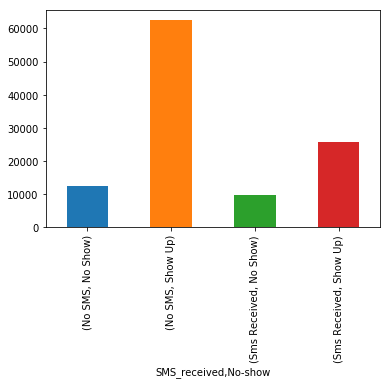

In [26]:
#Relacao de SMS vs Noshow
analysisData.groupby(['SMS_received','No-show']).size().plot(kind='bar')

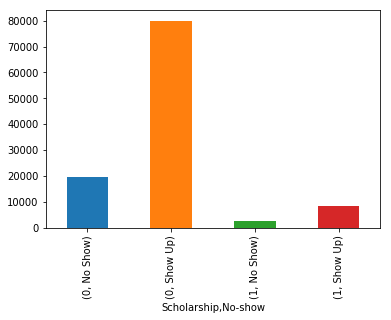

In [5]:
#Relacao de Scholarship vs Noshow
analysisData.groupby(['Scholarship','No-show']).size().plot(kind='bar')

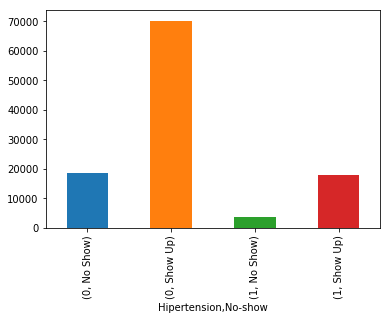

In [6]:
#Relacao de Hipertension vs Noshow
analysisData.groupby(['Hipertension','No-show']).size().plot(kind='bar')

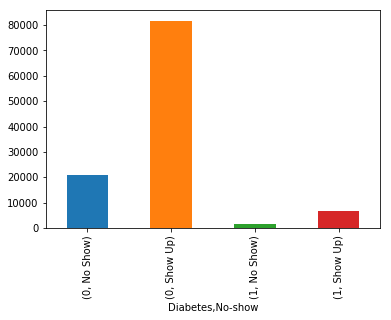

In [7]:
#Relacao de Diabetes vs Noshow
analysisData.groupby(['Diabetes','No-show']).size().plot(kind='bar')

In [13]:
def feature_engineering(df):
    """Realiza transformações nos dados para criação das features do modelo
    
    Parameters:
    -----------
    df: `pandas.DataFrame`. Contém os dados de medical appointments.
    
    Returns:
    --------
    formatted_df: `pandas.DataFrame`. Contém as features para o modelo.
    """
    
    #Drop dos IDS
    formatted_df = df.copy()
    formatted_df = formatted_df.drop('PatientId',1)
    formatted_df = formatted_df.drop('AppointmentID',1)

    #Renomeando a coluna No-show
    formatted_df.rename(columns={'No-show':'Noshow'}, inplace=True)

    #Transformacao dos dados
    formatted_df.Noshow = formatted_df.Noshow.map({'Yes': 1, 'No': 0})
    formatted_df.Gender = formatted_df.Gender.map({'F': 1, 'M': 0})
    formatted_df.Age = pds.to_numeric(formatted_df.Age)
    formatted_df.Neighbourhood = formatted_df.Neighbourhood.astype("category").cat.codes

    #Construcao de novas colunas
    formatted_df['SchMonth'] = formatted_df.ScheduledDay.str.slice(5,7)
    formatted_df['SchDay'] = formatted_df.ScheduledDay.str.slice(8,10)

    formatted_df.ScheduledDay = pds.to_datetime(formatted_df.ScheduledDay.str.slice(0,10))
    formatted_df.AppointmentDay = pds.to_datetime(formatted_df.AppointmentDay.str.slice(0,10))
    formatted_df['WaitingDays'] = abs((formatted_df.ScheduledDay - formatted_df.AppointmentDay).dt.days)

    #Drop de colunas
    formatted_df = formatted_df.drop('ScheduledDay',1)
    formatted_df = formatted_df.drop('AppointmentDay',1)
    
    return formatted_df

In [14]:
def scale_features(df):
    """Realiza a normalização das features do modelo
    
    Parameters:
    -----------
    df: `pandas.DataFrame`. Dataframe com as features do modelo.
    
    Returns:
    --------
    scaled_df: `pandas.DataFrame`. Dataframe com as features normalizadas.
    """
    
    scaled_df = df.copy()
    scaled_df.SchMonth = preprocessing.scale(list(scaled_df.SchMonth.astype(float)))
    scaled_df.SchDay = preprocessing.scale(list(scaled_df.SchDay.astype(float)))
    scaled_df.Age = preprocessing.scale(list(scaled_df.Age.astype(float)))
    scaled_df.Neighbourhood = preprocessing.scale(list(scaled_df.Neighbourhood.astype(float)))
    
    return scaled_df

In [16]:
data = originalData.copy()

#Cria as features para o modelo
data = feature_engineering(data)

#Normalizacao das features
data = scale_features(data)

#Remocao de dados invalidos
data = data[data.Age > 0]

data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,SchMonth,SchDay,WaitingDays
0,1,1.077932,-0.122410,0,1,0,0,0,0,0,-1.150983,1.578047,0
1,0,0.818306,-0.122410,0,0,0,0,0,0,0,-1.150983,1.578047,0
2,1,1.077932,0.145907,0,0,0,0,0,0,0,-1.150983,1.578047,0
4,1,0.818306,-0.122410,0,1,1,0,0,0,0,-1.150983,1.578047,0
5,1,1.683728,0.727263,0,1,0,0,0,0,0,-1.150983,1.364042,2


In [17]:
#Reindexação dos dados
data = data.reindex(columns=sorted(data.columns))
data = data.reindex(columns=(['Noshow'] + list([a for a in data.columns if a != 'Noshow'])))
data.head()

,Noshow,Age,Alcoholism,Diabetes,Gender,Handcap,Hipertension,Neighbourhood,SMS_received,SchDay,SchMonth,Scholarship,WaitingDays
0,0,1.077932,0,0,1,0,1,-0.122410,0,1.578047,-1.150983,0,0
1,0,0.818306,0,0,0,0,0,-0.122410,0,1.578047,-1.150983,0,0
2,0,1.077932,0,0,1,0,0,0.145907,0,1.578047,-1.150983,0,0
4,0,0.818306,0,1,1,0,1,-0.122410,0,1.578047,-1.150983,0,0
5,0,1.683728,0,0,1,0,1,0.727263,0,1.364042,-1.150983,0,2


([<matplotlib.axis.YTick at 0x7f3ac9213d30>,
 <a list of 13 Text yticklabel objects>)

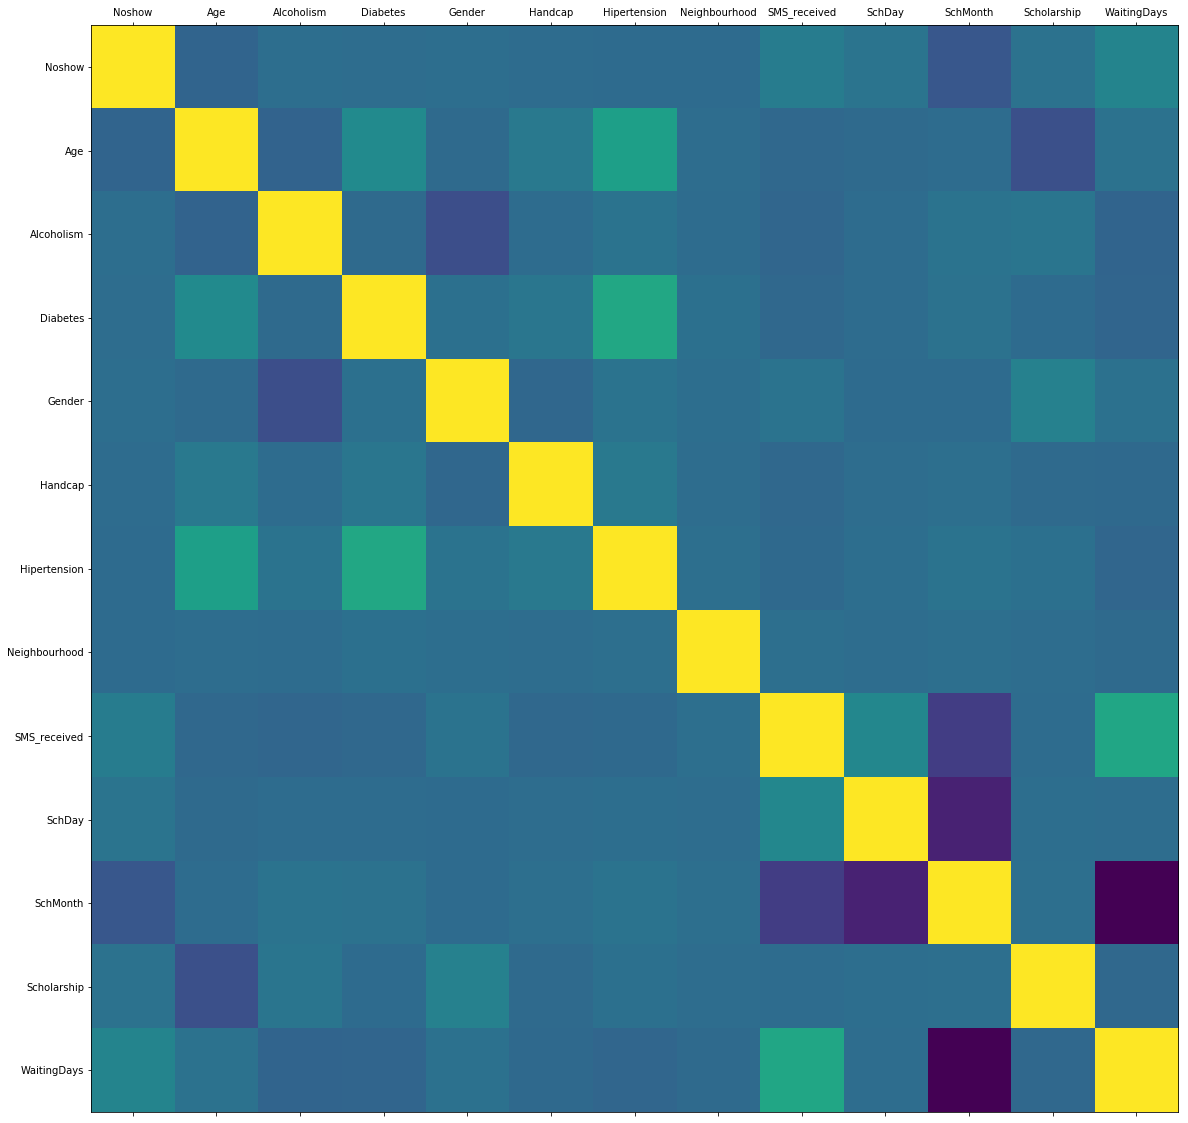

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [19]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [23]:
def train_val_test_split(X, y, test_size=0.2, random_state=0, over_sampling=False):
    """Gets input data and returns it splitted in three parts (training, validation and testing). Optionally, it can oversample the data.
    
    Parameters:
    -----------
    X: `pandas.DataFrame` or `pandas.Series`. Contains model features.
    y: `pandas.Series`. Contains the model target.
    test_size: `float`. test_size will be passed to sklearn.model_selection.train_test_split function.
    random_state: `integer`. random_state will be passed to sklearn.model_selection.train_test_split function.
    over_sampling: `boolean`. Indicates if data should be oversampled before returning the result.
    
    Returns:
    --------
    X_train = `pandas.DataFrame` or `pandas.Series`. Contains model features. Should be used on the model training phase.
    X_val = `pandas.DataFrame` or `pandas.Series`. Contains model features. Should be used on the model training phase.
    X_test = `pandas.DataFrame` or `pandas.Series`. Contains model features. Should be used for final model assessment.
    y_train = `pandas.Series`. Contains the model target. Should be used on the model training phase.
    y_val = `pandas.Series`. Contains the model target. Should be used on the model training phase.
    y_test = `pandas.Series`. Contains the model target. Should be used for final model assessment.
    """
    
    #Required function
    from sklearn.model_selection import train_test_split
    
    #Splits test from the rest
    X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)  
    
    #Splits train and validation
    X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=test_size, random_state=random_state)  
    
    #If over_sampling flag is set, than data is oversampled
    if (over_sampling==True):
        #Required function
        from imblearn.over_sampling import SMOTE
        
        #Creates oversampled set
        balancer = SMOTE(kind='regular')
        X_resampled_train, y_resampled_train = balancer.fit_sample(X_train, y_train)
        X_resampled_val, y_resampled_val = balancer.fit_sample(X_val, y_val)
        X_resampled_test, y_resampled_test = balancer.fit_sample(X_test, y_test)
        
        #Overrides original variables to make returning easier
        X_train = X_resampled_train        
        y_train = y_resampled_train
        X_val = X_resampled_val
        y_val = y_resampled_val
        X_test = X_resampled_test
        y_test = y_resampled_test
        
    #Returns dataset
    return X_train,X_val,X_test,y_train,y_val,y_test
        

In [38]:
#Separação do dataset
X = data.drop('Noshow',1)
y = data.Noshow
X_train,X_val,X_test,y_train,y_val,y_test = train_val_test_split(X,y,over_sampling=True)

In [39]:
#Validating the output
print('Normal Data: ', collections.Counter(y))
print('Resampled: ', collections.Counter(y_train))
print('Resampled: ', collections.Counter(y_val))
print('Resampled: ', collections.Counter(y_test))

Normal Data:  Counter({0: 44852, 1: 9558})
Resampled:  Counter({0: 28707, 1: 28707})
Resampled:  Counter({0: 7157, 1: 7157})
Resampled:  Counter({0: 8988, 1: 8988})


In [40]:
#Criacao dos modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  

algsSize = 3

#Algoritimos que serao treinados
algs = []
algs.append(RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=0))
algs.append(LogisticRegression(random_state=0, penalty='l2', C=1, fit_intercept=True, solver='liblinear'))
algs.append(DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')  )

for x in range(0, algsSize):
    print('Fitting: ', type(algs[x]).__name__)
    algs[x].fit(X_train, y_train)     

/home/DAITAN/ftsantos/.conda/envs/jupyter/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting:  RandomForestClassifier
Fitting:  LogisticRegression
Fitting:  DecisionTreeClassifier


In [42]:
#Definicao de dataframe para exibicao de resultados
results = pds.DataFrame(columns=['Name', 'Type', 'Resampled', 'ACC'])

In [43]:
#Função para display de resultados
def appendResult(alg, dataType, resampled, X, y):
    algName = type(alg).__name__
    predicted = alg.predict(X)
    accuracy = accuracy_score(y, predicted)
    results.loc[len(results)]=[algName, dataType, resampled, accuracy]
    print('Confusion Matrix - ', algName, ' RESAMPLED = ', resampled)
    plot_confusion_matrix(cm=confusion_matrix(y, predicted), target_names=['Show', 'NoShow'])

Confusion Matrix -  RandomForestClassifier  RESAMPLED =  Yes


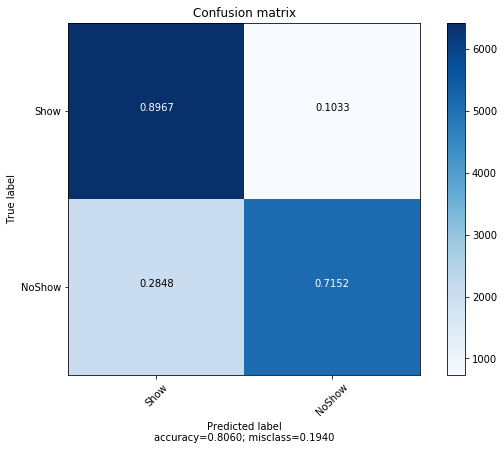

Confusion Matrix -  LogisticRegression  RESAMPLED =  Yes


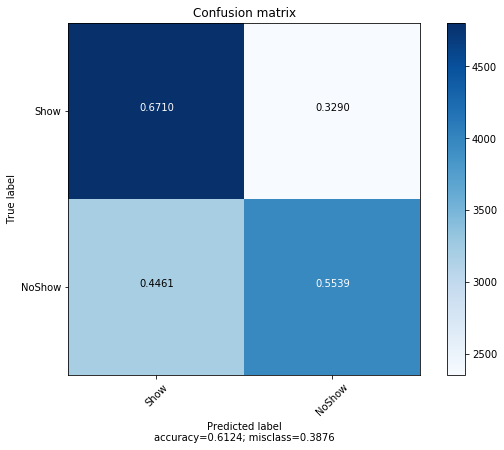

Confusion Matrix -  DecisionTreeClassifier  RESAMPLED =  Yes


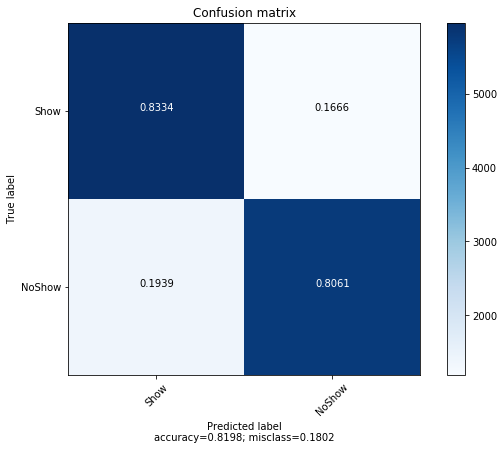

In [44]:
#Acuracia do modelo em VALIDACAO
for x in range(0, algsSize):
    appendResult(algs[x], 'Validation', 'Yes', X_val, y_val)    

Confusion Matrix -  RandomForestClassifier  RESAMPLED =  Yes


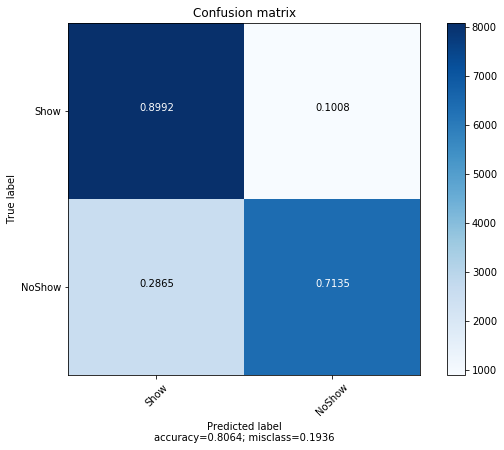

Confusion Matrix -  LogisticRegression  RESAMPLED =  Yes


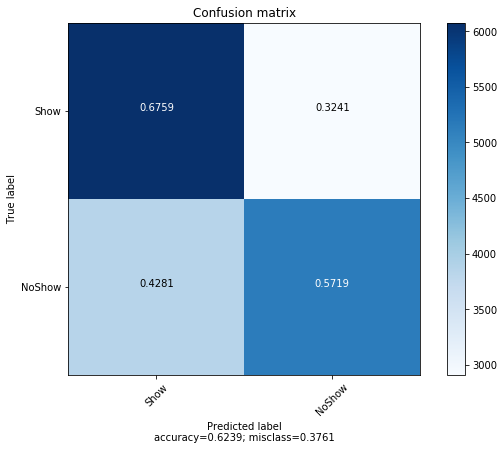

Confusion Matrix -  DecisionTreeClassifier  RESAMPLED =  Yes


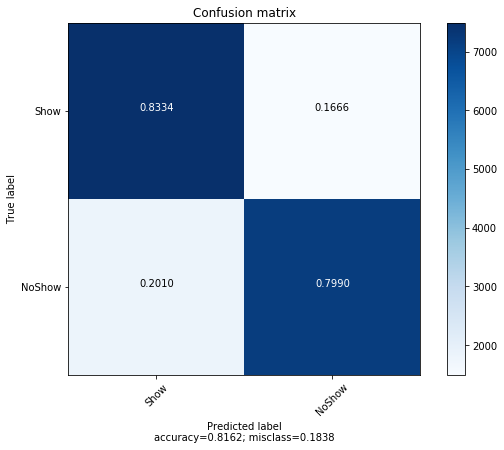

In [45]:
#Acuracia do modelo em TESTE
for x in range(0, algsSize):
    appendResult(algs[x], 'Test', 'Yes', X_test, y_test)    

In [46]:
#Resultados
results

,Name,Type,Resampled,ACC
0,RandomForestClassifier,Validation,Yes,0.805994
1,LogisticRegression,Validation,Yes,0.612407
2,DecisionTreeClassifier,Validation,Yes,0.819757
3,RandomForestClassifier,Test,Yes,0.806353
4,LogisticRegression,Test,Yes,0.623887
5,DecisionTreeClassifier,Test,Yes,0.816199
